## Sentiment Analysis of Real-time Flipkart Product Reviews

### Objective & Dataset
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.

<a href = "reviews_data_dump/reviews_badminton/data.csv">Flipkart Reviews Data.</a>

The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.



In [220]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
warnings.filterwarnings("ignore")

In [221]:
# Load the dataset
data = pd.read_csv("reviews_data_dump/reviews_badminton/data.csv")
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [222]:
# print various attributes available in the dataset
data.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [223]:
# print properties of attributes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [224]:
# Determine the shape of the DataFrame
data.shape

(8518, 8)

In [225]:
# check the number of null values per column
data.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [226]:
data.replace('',np.nan,inplace=True)

In [227]:

data.dropna(axis=0, how='any', inplace=True) # or directly data.dropna()

In [228]:
# check the number of null values per column replacing with nan and dropping nan
print(data.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [230]:
# adding a sentiment column to classify reviews as Positive or Negative
# Positive = 1
# Negative = 0

# Method 1: Using numpy's where function
data['sentiment'] = np.where(data['Ratings'] == 5.0, 1,
                              np.where(data['Ratings'] == 4.0, 1, 0))

In [231]:
# Method 2: Using pandas' map function
# Create a dictionary mapping star ratings to sentiments
rating_sentiment_map = {5.0: 1, 4.0: 1, 1.0: 0, 2.0: 0, 3.0: 0}

# Map star ratings to sentiments using the dictionary
data['sentiment'] = data['Ratings'].map(rating_sentiment_map)

In [232]:
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,1


### Modeling Approach
1. Model Selection: Train and evaluate various machine learning and deep learning models using the embedded text data.
2. Evaluation Metric: Use the F1-Score as the evaluation metric to assess the performance of the models in classifying sentiment.

### Step 1: Identify Input and Output

In [233]:
# Step 1: Identify Input and Output
X = data["Review text"]
y = data["sentiment"]

In [234]:
X

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
                              ...                        
8495    Thanks to the delivery boy ... Service is alwa...
8496    Over priced even after 50% discount price is m...
8497    Too much priced. It was getting me for Rs. 640...
8499    Hii flipkart customers care..why your delivery...
8507                         Nice delivery speedREAD MORE
Name: Review text, Length: 8013, dtype: object

### Step 2: Split the data into training and testing sets

In [235]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [236]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6410,)
Shape of X_test: (1603,)
Shape of y_train: (6410,)
Shape of y_test: (1603,)


### Step 3: Data Preprocessing on train data (X_train)


In [237]:
import re
import string
import nltk
from nltk.corpus import stopwords

def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Remove end read more characters
    text = re.sub(r'read more', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt') 
nltk.download('wordnet')

In [238]:
# Apply text cleaning to the X_train
X_train_cleaned = X_train.apply(clean_text)

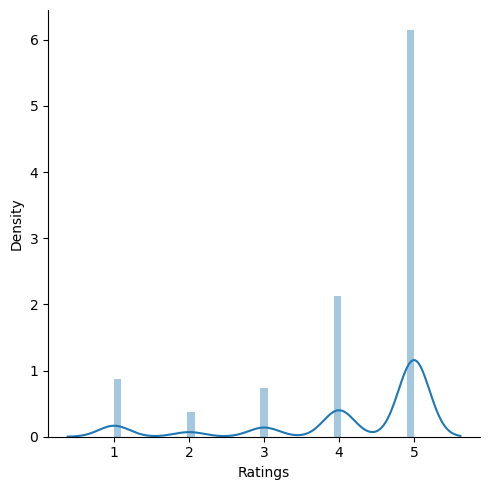

In [239]:
# In other way using histogram 
sns.FacetGrid(data, height=5).map(sns.distplot, "Ratings")

plt.show()

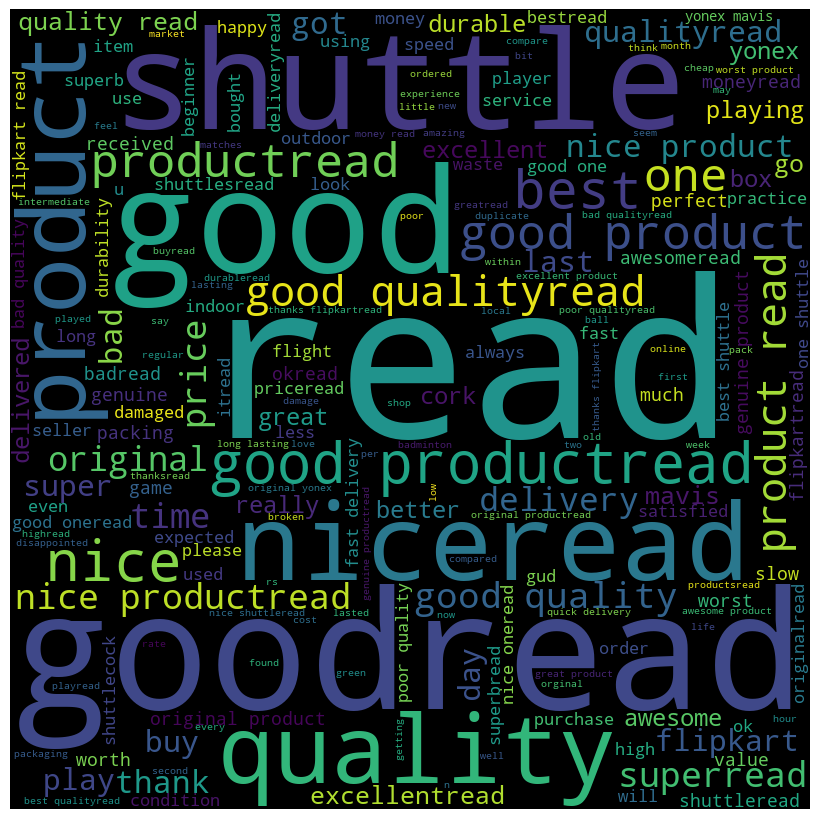

CPU times: total: 1.91 s
Wall time: 5.16 s


In [240]:
%%time

comment_words = ''
stopwords_w = set(STOPWORDS)
 
for val in data['Review text']:
     
    val = str(val)
 
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                stopwords = stopwords_w,
                min_font_size = 10).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [241]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_words)

In [242]:
# Apply lemmatization to the X_train_cleaned
X_train_cleaned = X_train_cleaned.apply(lemmatize_text)
X_train_cleaned

4201                                              awesome
1585                                         good product
1692            great product highly recommended practice
5742                                        worst quality
8127                                     good value money
                              ...                        
8406                       product good got best price fk
5652                                                 good
4440                                                super
254     love really guudas well fantastic delivery ear...
5617                                                 good
Name: Review text, Length: 6410, dtype: object

In [243]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# use it to extract features from cleaned training data
%time X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_cleaned)

print(X_train_tfidf.shape)


CPU times: total: 31.2 ms
Wall time: 110 ms
(6410, 2177)


### Step 4 - Data Preprocessing on test data (X_test)

In [244]:
# Apply text cleaning to the X_test
X_test_cleaned = X_test.apply(clean_text)

# Apply lemmatization to the X_test_cleaned
X_test_cleaned = X_test_cleaned.apply(lemmatize_text)
X_test_cleaned

3350                 bought flipkart totally bought price
2414                                             expected
6751                                                 good
8367                                                 nice
5773                                                 good
                              ...                        
7639                     timely delivery product expected
2143                                                 good
3564    good product quality practice shuttle work min...
2634                                                 good
1359                                                 nice
Name: Review text, Length: 1603, dtype: object

In [245]:
# Transform the cleaned X test data
%time X_test_tfidf = tfidf_vectorizer.fit_transform(X_test_cleaned)

print(X_test_tfidf.shape)

CPU times: total: 31.2 ms
Wall time: 37.4 ms
(1603, 882)


## Naive Bayes Model

### Step 5 - Building a Model (i.e. Train the classifier)

In [246]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

# Train the classifier
nb= MultinomialNB()
%time nb.fit(X_train_tfidf, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 7.77 ms


MultinomialNB()

### Step 6 - Evaluating on Train Data

In [247]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_train_pred = nb.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8884555382215289
f1_score: 0.8741649941927364
confusion matrix:
 [[ 592  652]
 [  63 5103]]


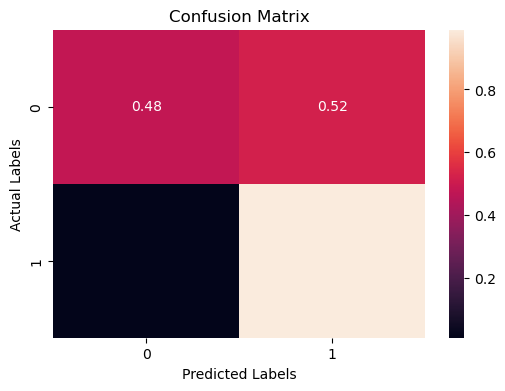

In [248]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

### Step 7 - Evaluate on Test Data

In [249]:
# Step-5: Test the model on test data
%time nb.fit(X_test_tfidf, y_test) 

CPU times: total: 0 ns
Wall time: 8.02 ms


MultinomialNB()

In [250]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = nb.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8945726762320648
f1_score: 0.879198558319291
confusion matrix:
 [[ 143  164]
 [   5 1291]]


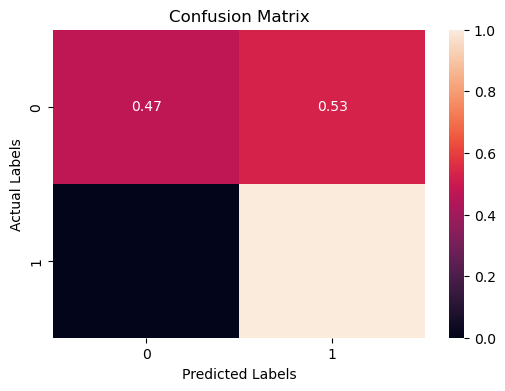

In [251]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## Support Vector Classifiers Model

### Step 5 - Building a Model (i.e. Train the classifier)

In [252]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(kernel='linear')

%time svm.fit(X_train_tfidf, y_train)

CPU times: total: 1.12 s
Wall time: 2.3 s


SVC(kernel='linear')

### Step 6 - Evaluating on Train Data

In [253]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = svm.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9090483619344774
f1_score: 0.9013409453956255
confusion matrix:
 [[ 737  507]
 [  76 5090]]


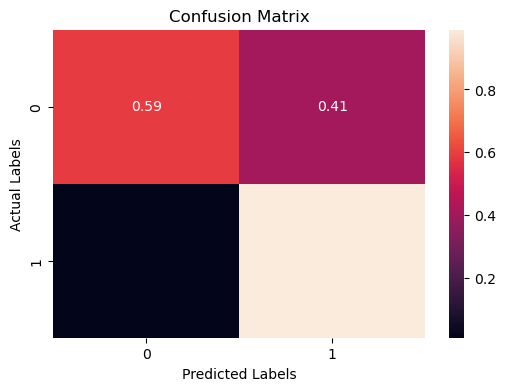

In [254]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

### Step 7 - Evaluate on Test Data

In [255]:
# Step-5: Test the model on test data
%time svm.fit(X_test_tfidf, y_test) 

CPU times: total: 109 ms
Wall time: 133 ms


SVC(kernel='linear')

In [256]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = svm.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)


Accuracy: 0.9213973799126638
f1_score: 0.9158178510364754
confusion matrix:
 [[ 198  109]
 [  17 1279]]


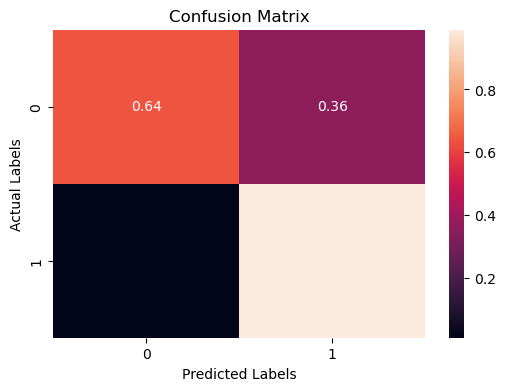

In [257]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## Logistic regression Model

### Step 5 - Building a Model (i.e. Train the classifier)

In [258]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lgr = LogisticRegression()

%time lgr.fit(X_train_tfidf, y_train)

CPU times: total: 78.1 ms
Wall time: 148 ms


LogisticRegression()

### Step 6 - Evaluating on Train Data

In [259]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = lgr.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8897035881435258
f1_score: 0.8762302443584569
confusion matrix:
 [[ 606  638]
 [  69 5097]]


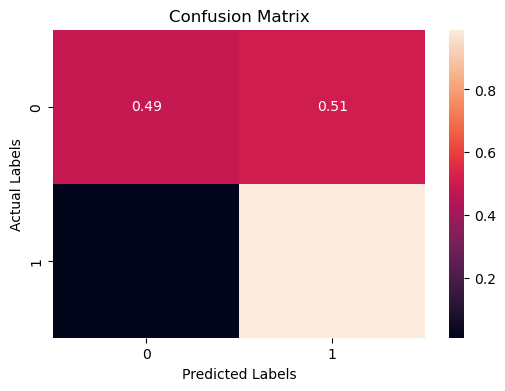

In [260]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

### Step 7 - Evaluate on Test Data

In [261]:
# Step-5: Test the model on test data
%time lgr.fit(X_test_tfidf, y_test)

CPU times: total: 46.9 ms
Wall time: 65.5 ms


LogisticRegression()

In [262]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = lgr.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8870867124142233
f1_score: 0.8726230435896039
confusion matrix:
 [[ 144  163]
 [  18 1278]]


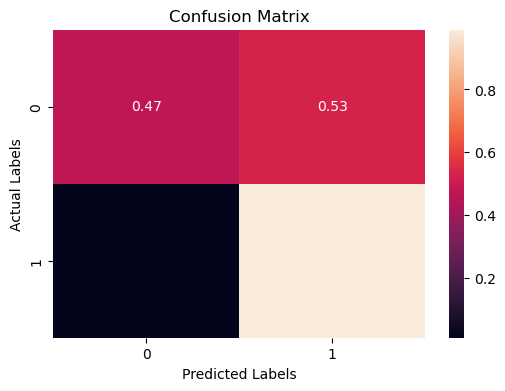

In [263]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## Random Forest Model

### Step 5 - Building a Model (i.e. Train the classifier)

In [264]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
random_forest = RandomForestClassifier()

%time random_forest.fit(X_train_tfidf, y_train)

CPU times: total: 7.09 s
Wall time: 15.5 s


RandomForestClassifier()

### Step 6 - Evaluating on Train Data

In [265]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = random_forest.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.950390015600624
f1_score: 0.9482051458119348
confusion matrix:
 [[ 960  284]
 [  34 5132]]


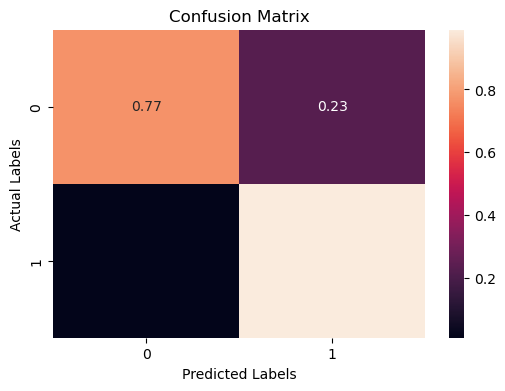

In [266]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()


### Step 7 - Evaluate on Test Data

In [267]:
# Step-5: Test the model on test data
%time random_forest.fit(X_test_tfidf, y_test) 

CPU times: total: 1.42 s
Wall time: 2.25 s


RandomForestClassifier()

In [268]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = random_forest.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)


Accuracy: 0.9600748596381784
f1_score: 0.9586829210132136
confusion matrix:
 [[ 250   57]
 [   7 1289]]


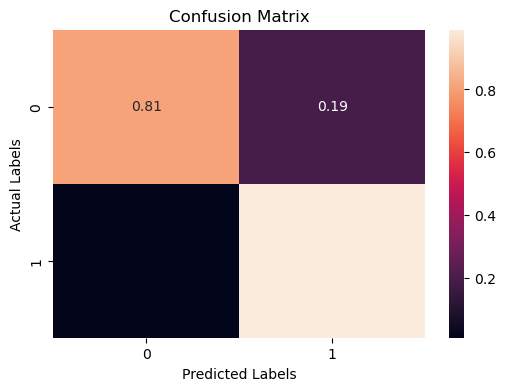

In [269]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## K-Nearest Neighbor model

### Step 5 - Building a Model (i.e. Train the classifier)

In [270]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kneighbors classifier
knn = KNeighborsClassifier()

%time knn.fit(X_train_tfidf, y_train)

CPU times: total: 0 ns
Wall time: 5.99 ms


KNeighborsClassifier()

### Step 6 - Evaluating on Train Data

In [271]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = knn.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)


# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.890795631825273
f1_score: 0.8789846220443445
confusion matrix:
 [[ 634  610]
 [  90 5076]]


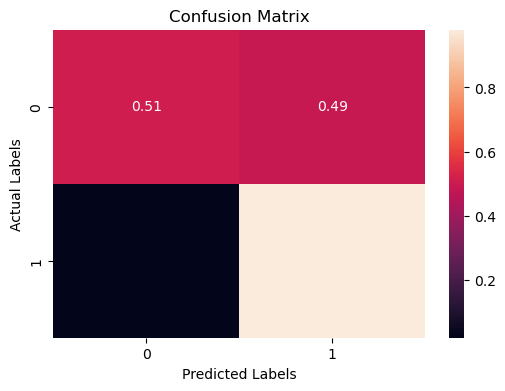

In [272]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

### Step 7 - Evaluate on Test Data

In [273]:
# Step-5: Test the model on test data
%time knn.fit(X_test_tfidf, y_test) 

CPU times: total: 0 ns
Wall time: 4 ms


KNeighborsClassifier()

In [274]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = knn.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)


Accuracy: 0.8746101060511541
f1_score: 0.8521246873562499
confusion matrix:
 [[ 115  192]
 [   9 1287]]


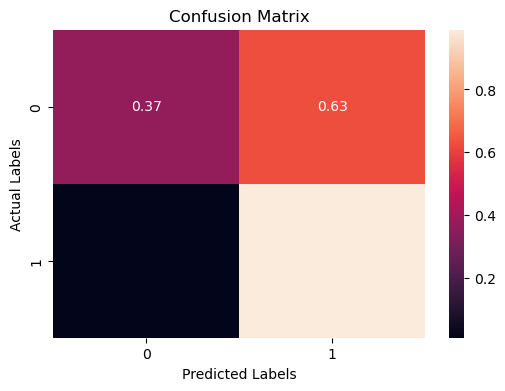

In [275]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [279]:
# Create nltk.download file  to save trained model of each model
from joblib import dump

# Save the trained model as a .pkl file
dump(nb, 'models/MultinomialNB_model.pkl')

dump(svm, 'models/SVC_model.pkl')

dump(lgr, 'models/Logestic_Reggression_model.pkl')

dump(random_forest, 'models/Random_forest_model.pkl')

dump(knn, 'models/KNeighbors_model.pkl')

# Save the TF-IDF vectorizer as a .pkl file
dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')


['models/tfidf_vectorizer.pkl']

### Based on the highest F1 scores:
#### RandomForestClassifier has highest F1 score and is the best model for production

In [280]:
from joblib import load

# Load the Random Forest model from a .pkl file
random_forest_model = load('models/Random_forest_model.pkl')
def predict_sentiment(input_text):
    # Preprocess the input text
    preprocess_text = clean_text(input_text)

    preprocessed_text = lemmatize_text(preprocess_text)

    features = tfidf_vectorizer.transform([preprocessed_text])
    
    prediction = random_forest_model.predict(features)[0]
    
    if prediction == 1:
        return "Positive"
    else:
        return "Negative"

# Example usage:
input_text ="very good product"
sentiment = predict_sentiment(input_text)
print("Sentiment:", sentiment)

Sentiment: Positive
